In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, gamma

$$\begin{aligned}P(|Z| > z) &= P(Z > z) + P(-Z > z)\\&= (1 - P(Z <z)) + P(Z < -z) \\&= 1 - cdf(z) + cdf(-z)\end{aligned}$$

In [2]:
class Gaussian:
    def pdf_gaussian(self, x):
        self.pdf = np.exp(- x ** 2 / 2) / np.sqrt(2 * pi)
        return self.pdf
    
    def cdf(self, x):
        p_x = self.pdf_gaussian(x)
        
        cdf_temp = []
        for i in range(len(p_x)):
            temp = np.sum(p_x[:i + 1])
            cdf_temp.append(temp)

        return cdf_temp / cdf_temp[-1]

In [3]:
class StudentT: 
    def pdf_t(self, x, dof):
        self.t = (gamma((dof + 1) / 2) / (np.sqrt(pi * dof) * gamma(dof / 2))) * (1 + x ** 2 / dof) ** -((dof + 1) / 2)
        return self.t
    
    def cdf(self, x, dof):
        p_x = self.pdf_t(x, dof)
        
        cdf_temp = []
        for i in range(len(p_x)):
            temp = np.sum(p_x[:i + 1])
            cdf_temp.append(temp)

        return cdf_temp / cdf_temp[-1]
        

In [9]:
data = np.random.randn(10000)
data_min = data.min()
data_max = data.max()

x = np.linspace(data_min, data_max, 10000)

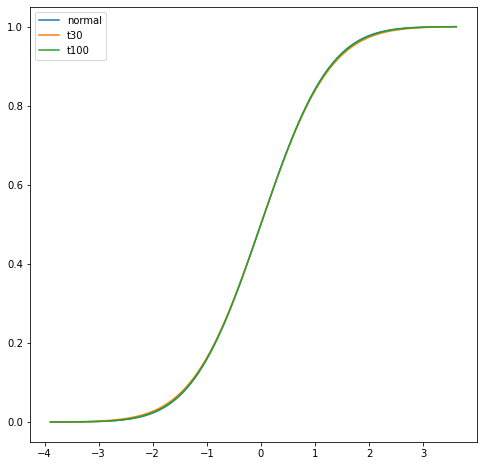

In [10]:
cdf_dict = dict()
gaussian = Gaussian()
student = StudentT()
cdf_dict['normal'] = gaussian.cdf(x)
cdf_dict['t30'] = student.cdf(x, 30)
cdf_dict['t100'] = student.cdf(x, 100)

plt.figure(figsize=(8, 8))
for key in cdf_dict.keys():
    plt.plot(x, cdf_dict[key], label=key)
plt.legend()

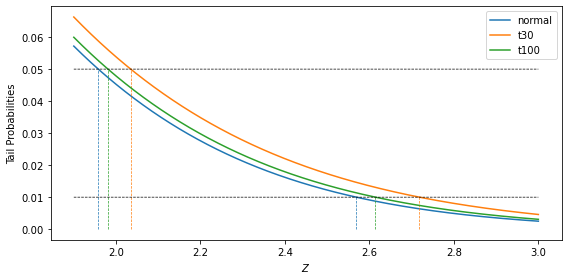

In [11]:
idx1 = np.where(np.logical_and(x>= 1.9, x<= 3))[0]
idx2 = np.where(np.logical_and(x<= -1.9, x>= -3))[0][::-1]
x_sub = x[idx1]

plt.figure(figsize=(8, 4))
p = [0.05, 0.01]
for i, key in enumerate(cdf_dict.keys()):
    cdf1 = cdf_dict[key][idx1]
    cdf2 = cdf_dict[key][idx2]
    cdf_sub = 1 - cdf1 + cdf2
    plt.plot(x_sub, cdf_sub, color='C{}'.format(i), label=key)
    for p_ in p:
        # find index where cdf = p_ or cdf ~= p_ because there is no data point where cdf = p exactly.
        idx = np.argmin(np.abs(cdf_sub - p_))
        x_ = [x_sub[idx], x_sub[idx]]
        y_ = [0, p_]
        plt.plot(x_, y_, '--', color='C{}'.format(i), linewidth=0.7)
    
plt.xlabel('$Z$')
plt.ylabel('Tail Probabilities', rotation=90)
plt.legend()
plt.plot(x_sub, 0.05 * np.ones_like(x_sub), '--k', linewidth=0.7)
plt.plot(x_sub, 0.01 * np.ones_like(x_sub), '--k', linewidth=0.7)
plt.tight_layout()